## Specific code to reproduce plots from the paper

In [53]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, PrecisionRecallDisplay
from tqdm.auto import tqdm

In [15]:
# Inputs
clinvar_scores = "../stats/binary_stats.csv"
dms_scores = "../stats/regression_stats.csv"

# Outputs
PLOT_DIR = "./plots/"

## Figure 1: Scatter of DMS Spearman’s and human AUCs for every model

In [16]:
!ls "../outputs/output_scores/ClinVar_Tranception_Large_0.6_retrieval/"

NP_000007.1.csv     NP_001009899.3.csv	NP_003064.2.csv  NP_056161.2.csv
NP_000008.1.csv     NP_001009944.3.csv	NP_003065.3.csv  NP_056183.2.csv
NP_000009.1.csv     NP_001012632.1.csv	NP_003110.1.csv  NP_056280.2.csv
NP_000010.1.csv     NP_001013.1.csv	NP_003117.2.csv  NP_056321.2.csv
NP_000011.2.csv     NP_001013861.1.csv	NP_003127.1.csv  NP_056414.1.csv
NP_000012.1.csv     NP_001015877.1.csv	NP_003163.1.csv  NP_056444.3.csv
NP_000017.1.csv     NP_001015880.1.csv	NP_003273.1.csv  NP_056477.1.csv
NP_000018.2.csv     NP_001018005.1.csv	NP_003280.2.csv  NP_056496.1.csv
NP_000021.1.csv     NP_001018125.1.csv	NP_003292.1.csv  NP_056528.2.csv
NP_000024.2.csv     NP_001019801.3.csv	NP_003313.3.csv  NP_056993.2.csv
NP_000026.2.csv     NP_001025067.1.csv	NP_003327.2.csv  NP_056999.2.csv
NP_000032.1.csv     NP_001026.2.csv	NP_003352.2.csv  NP_057006.1.csv
NP_000034.1.csv     NP_001026895.2.csv	NP_003385.2.csv  NP_057088.2.csv
NP_000035.2.csv     NP_001027392.1.csv	NP_003403.2.csv  NP_057119.3.cs

In [17]:
# Manually calculate stats for now

# Clinvar
tranception_clinvar_folders = ["../outputs/output_scores/gnomAD_Tranception_Large_0.6_retrieval/"]  # "../outputs/output_scores/ClinVar_Tranception_Large_0.6_retrieval/",
"../outputs/output_scores/ClinVar_Tranception_Large_0.6_retrieval/",

def concat_files(score_folders):
    score_dfs = []
    failures = []
    for score_folder in score_folders:
        for score_file in tqdm(os.listdir(score_folder)):
            if os.stat(os.path.join(score_folder, score_file)).st_size == 0:
                failures.append(score_file)
                continue
            score_dfs.append(pd.read_csv(os.path.join(score_folder, score_file)))
    if len(failures) > 0:
        print(f"{len(failures)} Failed files:", failures)
    return pd.concat(score_dfs, axis=0)

df_tranception_clinvar = concat_files(tranception_clinvar_folders)
df_tranception_clinvar.head()


  0%|          | 0/697 [00:00<?, ?it/s]

,mutated_sequence,avg_score_L_to_R,avg_score_R_to_L,avg_score,model_score,label
0,MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...,0.001160,0.000842,0.001001,0.001001,Benign
0,MAKKVAVIGAGVSGLISLKCCVDEGLEPTCFERTEDIGGVWRFKEN...,-0.011327,-0.041727,-0.026527,-0.026527,Benign
0,MLRYLLKTLLQMNLFADSLAGDISNSSELLLGFNSSLAALNHTLLP...,-0.002029,-0.001449,-0.001739,-0.001739,Benign
0,MNYPGRGSPRSPEHNGRGGGGGAWELGSDARPAFGGGVCCFEHLPG...,-0.006794,-0.006211,-0.006503,-0.006503,Benign
0,MEAVKAEAWEGAAVAQDLLALGYGGVPGAASRGASCPDFRGLCVRL...,0.004133,-0.000435,0.001849,0.001849,Benign


In [18]:
# HMM
hmm_clinvar_folders = ["../outputs/output_scores/ClinVar_HMM","../outputs/output_scores/gnomAD_HMM"]
df_hmm_clinvar = concat_files(hmm_clinvar_folders)
df_hmm_clinvar.describe()
df_hmm_clinvar.head()

  0%|          | 0/858 [00:00<?, ?it/s]

  0%|          | 0/697 [00:00<?, ?it/s]

,seq_name,fwd_raw,bg_ll,logprob,mutated_sequence,model_score,label
0,Thr280_Pro281delinsSer,359.926056,-1103.736206,-743.810181,MEEPEEPADSGQSLVPVYIYSPEYVSMCDSLAKIPKRASMVHSLIE...,-1.546509,Pathogenic
0,Ala192_Trp193insAla,418.809509,-1000.22168,-581.41217,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,-6.588501,Pathogenic
0,Ile124dup,232.498016,-622.521362,-390.023346,MASTGLELLGMTLAVLGWLGTLVSCALPLWKVTAFIGNSIVVAQVV...,-6.695984,Pathogenic
0,Ile66_Gly67delinsArg,219.321594,-672.401794,-453.0802,MAEEMESSLEASFSSSGAVSGASGFLPPARSRIFKIIVIGDSNVGK...,-5.513245,Pathogenic
0,Ser213del,391.202362,-1109.257935,-718.055542,MAAVGAGGSTAAPGPGAVSAGALEPGTASAAHRRLKYISLAVLVVQ...,-3.090759,Pathogenic


In [19]:
df_hmm_clinvar[["model_score", "label"]].isna().sum()

model_score    4
label          0
dtype: int64

## Collate scores

In [20]:
df_hmm_clinvar["label"].value_counts(dropna=False)

Pathogenic    1796
Benign         839
Name: label, dtype: int64

In [21]:
# TMP. Very TMP
# Tranception file only has benigns - let's change this just for mock purposes
print(df_tranception_clinvar["label"].value_counts())

df_tranception_clinvar = pd.concat([df_tranception_clinvar, pd.DataFrame({"mutated_sequence": "TEMP", "label": "Pathogenic", "model_score": 0.0}, index=[0])], ignore_index=True, axis=0)


Benign    839
Name: label, dtype: int64


In [22]:
df_tranception_clinvar["Model Name"] = "Tranception Large"
df_hmm_clinvar["Model Name"] = "HMM"

df_preds = pd.concat([df_tranception_clinvar[["mutated_sequence", "model_score", "label", "Model Name"]].dropna(),
                      df_hmm_clinvar[["mutated_sequence", "model_score", "label", "Model Name"]].dropna()])
df_preds

,mutated_sequence,model_score,label,Model Name
0,MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...,0.001001,Benign,Tranception Large
1,MAKKVAVIGAGVSGLISLKCCVDEGLEPTCFERTEDIGGVWRFKEN...,-0.026527,Benign,Tranception Large
2,MLRYLLKTLLQMNLFADSLAGDISNSSELLLGFNSSLAALNHTLLP...,-0.001739,Benign,Tranception Large
3,MNYPGRGSPRSPEHNGRGGGGGAWELGSDARPAFGGGVCCFEHLPG...,-0.006503,Benign,Tranception Large
4,MEAVKAEAWEGAAVAQDLLALGYGGVPGAASRGASCPDFRGLCVRL...,0.001849,Benign,Tranception Large
...,...,...,...,...
0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,-5.090210,Benign,HMM
0,MSAPPVLRPPSPLLPVAAAAAAAAAALVPGSGSGPGPAPFLAPVAA...,-7.313477,Benign,HMM
0,MVFESVVVDVLNRFLGDYVVDLDTSQLSLGIWKGAVALKNLQIKEN...,-2.996582,Benign,HMM
0,MKALIAALLLITLQYSCAVSPTDCSAVEPEAEKALDLINKRRRDGY...,-1.841553,Benign,HMM


Stats for Tranception Large
Benign        839
Pathogenic      1
Name: label, dtype: int64
Stats for HMM
Pathogenic    1794
Benign         837
Name: label, dtype: int64


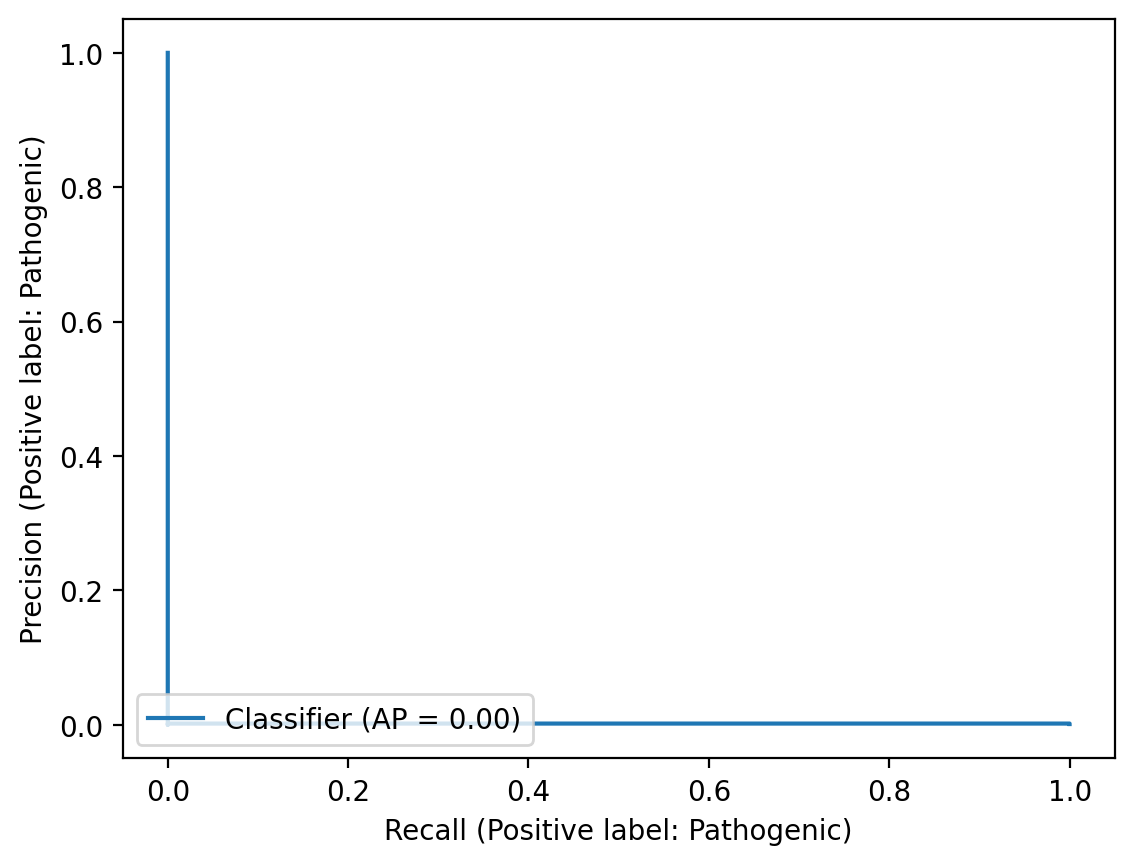

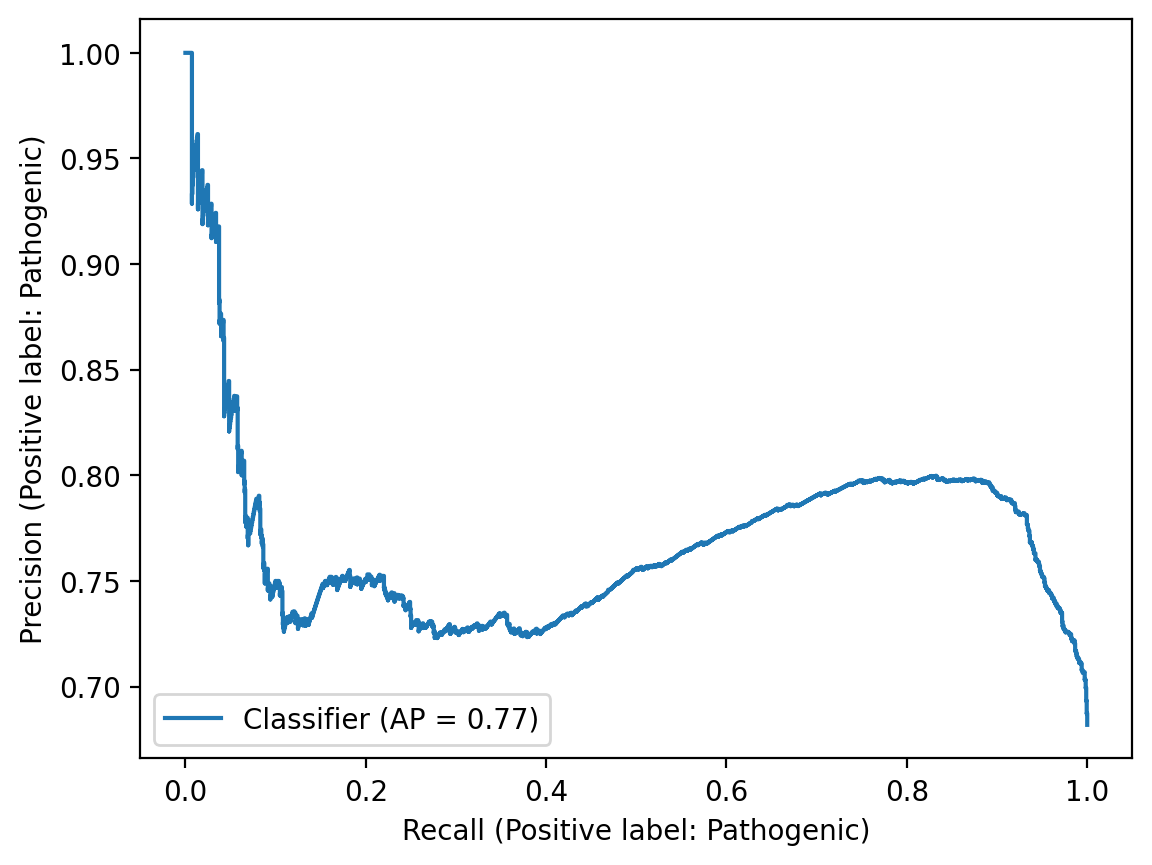

In [ ]:
df_scores = pd.DataFrame(columns=["Model Name", "ROC-AUC", "Average Precision"])

rows = []
for model in ["Tranception Large", "HMM"]:
    print(f"Stats for {model}")
    df_subset = df_preds[df_preds["Model Name"] == model]
    assert len(df_subset) > 0
    row = {"Model Name": model}
    # Important: Model predictions are higher = more fit = less pathogenic. So we have to flip the model predictions when scoring
    print(df_subset["label"].value_counts(dropna=False))
    row["ROC-AUC"] = roc_auc_score(y_score=-df_subset["model_score"], y_true=df_subset["label"])
    row["Average Precision"] = average_precision_score(y_score=-df_subset["model_score"], y_true=df_subset["label"], pos_label="Pathogenic", average="weighted")#"Pathogenic")
    # row["Precision"] = precision_score(y_true=df_subset["label"], y_pred=-df_subset["model_score"], pos_label="Pathogenic")
    # row["Recall"] = recall_score(y_true=df_subset["label"], y_pred=-df_subset["model_score"], pos_label="Pathogenic")
    p = PrecisionRecallDisplay.from_predictions(y_true=df_subset["label"], y_pred=-df_subset["model_score"], pos_label="Pathogenic")
    plt.savefig(f"./plots/ClinVar_PrecisionRecall_{model}.png")
    rows.append(row)

df_scores = pd.DataFrame(rows)

# df_hmm_clinvar = df_hmm_clinvar[["seq_name", "mutated_sequence", "model_score", "label"]].dropna()
# hmm = {"Model Name": "HMM"}
# hmm["ROC-AUC"] = roc_auc_score(y_score=df_hmm_clinvar["model_score"], y_true=df_hmm_clinvar["label"])
# hmm["Average Precision"] = average_precision_score(y_score=df_hmm_clinvar["model_score"], y_true=df_hmm_clinvar["label"], pos_label="Pathogenic")

# df_scores.append(hmm, ignore_index=True)

## Plot clinical AUPRC vs performance

In [45]:
df_scores

,Model Name,ROC-AUC,Average Precision
0,Tranception Large,0.374255,0.001901
1,HMM,0.674818,0.769205


In [13]:
sns.barplot(data=df_scores, y='Average Precision', x='Model Name')

ValueError: Could not interpret input 'Model Name'